# Thorough Comparison of Reconstruction Methods

**Author:** Jakub Walczak, PhD

The analysis relies on the experiments' results collected for three investigated methods: OK, IDW, and SiNET.
For each out of 100 samples the hyper-parameter optimisation was carried out. Having optimised hyperparameters, 
the evaluation of methods on test test was performed.

In [44]:
from pathlib import Path

import pandas as pd
import numpy as np

In [2]:
NOTEBOOK_DIR = Path(__session__).parent.parent

In [10]:
RESULTS_DIR = NOTEBOOK_DIR / "results"
OK_RESULTS = RESULTS_DIR / "ok"
SINET_RESULTS = RESULTS_DIR / "inr" / "sinet"
MMGN_RESULTS = RESULTS_DIR / "inr" / "mmgn"
IDW_RESULTS = RESULTS_DIR / "idw"

## 1. Metrics Comparison

In [34]:
ok_data = pd.read_csv(OK_RESULTS / "metrics.csv").set_index("dataset_id").add_suffix("_ok", axis=1)
idw_data = pd.read_csv(IDW_RESULTS / "metrics.csv").drop("Unnamed: 0", axis=1).set_index("dataset_id").add_suffix("_idw", axis=1)
mmgn_data = pd.read_csv(MMGN_RESULTS / "metrics.csv").set_index("dataset_id").add_suffix("_mmgn", axis=1)
sinet_data = pd.read_csv(SINET_RESULTS / "metrics.csv").set_index("dataset_id").add_suffix("_sinet", axis=1)

In [35]:
all_data = pd.merge(
    idw_data,
    ok_data,
    how="inner",
    on="dataset_id",
)
all_data = pd.merge(
    all_data,
    mmgn_data,
    how="inner",
    on="dataset_id"
)
all_data = pd.merge(
    all_data,
    sinet_data,
    how="inner",
    on="dataset_id"
)
all_data.head()

,RMSE_idw,MAE_idw,Max Abs Error_idw,R^2_idw,RMSE_ok,MAE_ok,Max Abs Error_ok,R^2_ok,RMSE_mmgn,MAE_mmgn,Max Abs Error_mmgn,R^2_mmgn,RMSE_sinet,MAE_sinet,Max Abs Error_sinet,R^2_sinet
dataset_id,,,,,,,,,,,,,,,,
18840905,1.653969,0.539895,10.087725,0.697874,1.960899,1.335547,7.551665,0.085027,1.432186,0.495411,8.756209,0.726941,1.492749,0.570955,9.794591,0.726826
18870704,1.970164,0.512600,14.194962,0.842000,3.178459,2.259022,19.573852,-0.462073,1.727897,0.557220,11.694089,0.875672,2.405093,0.775432,13.085990,0.764045
18931102,2.251932,0.621723,17.855036,0.643486,3.042746,1.443131,16.895596,0.551754,3.086553,0.863099,29.147049,0.173935,3.088463,0.890437,29.286058,0.154474
18960629,1.332282,0.453504,7.211687,0.856173,3.154360,2.332571,17.886671,-1.306745,1.464110,0.553780,5.743105,0.803271,1.898802,0.873283,9.587229,0.608950
18990407,1.991561,0.661112,12.448601,0.882943,6.624101,4.983832,17.626940,-0.762217,4.203753,1.226080,39.442589,0.599226,3.169906,1.141294,21.160767,0.623415


In [36]:
order = ["idw", "ok", "mmgn", "sinet"]
rmse_best_idx = np.argmin(
    all_data[["RMSE_idw", "RMSE_ok", "RMSE_mmgn", "RMSE_sinet"]], axis=1
)
r2_best_idx = np.argmax(all_data[["R^2_idw", "R^2_ok", "R^2_mmgn", "R^2_sinet"]], axis=1)
mabs_best_idx = np.argmin(
    all_data[["Max Abs Error_idw", "Max Abs Error_ok", "Max Abs Error_mmgn", "Max Abs Error_sinet"]],
    axis=1,
)

all_data["best_RMSE"] = [order[i] for i in rmse_best_idx]
all_data["best_R^2"] = [order[i] for i in r2_best_idx]
all_data["best_Max Abs Error"] = [order[i] for i in mabs_best_idx]

In [38]:
all_data = all_data[
    [
        "RMSE_idw",
        "RMSE_ok",
        "RMSE_sinet",
        "best_RMSE",
        "Max Abs Error_idw",
        "Max Abs Error_ok",
        "Max Abs Error_sinet",
        "best_Max Abs Error",
        "R^2_idw",
        "R^2_ok",
        "R^2_sinet",
        "best_R^2",
    ]
]

In [8]:
all_data

,dataset_id,RMSE_idw,RMSE_ok,RMSE_sinet,best_RMSE,Max Abs Error_idw,Max Abs Error_ok,Max Abs Error_sinet,best_Max Abs Error,R^2_idw,R^2_ok,R^2_sinet,best_R^2
0,18840905,1.653969,1.960899,1.492749,sinet,10.087725,7.551665,9.794591,ok,0.697874,0.085027,0.726826,sinet
1,18870704,1.970164,3.178459,2.405093,idw,14.194962,19.573852,13.085990,sinet,0.842000,-0.462073,0.764045,idw
2,18931102,2.251932,3.042746,3.088463,idw,17.855036,16.895596,29.286058,ok,0.643486,0.551754,0.154474,idw
3,18960629,1.332282,3.154360,1.898802,idw,7.211687,17.886671,9.587229,idw,0.856173,-1.306745,0.608950,idw
4,18990407,1.991561,6.624101,3.169906,idw,12.448601,17.626940,21.160767,idw,0.882943,-0.762217,0.623415,idw
5,19030303,2.453619,4.412405,3.850734,idw,15.774864,17.708659,35.525627,idw,0.796378,-0.086903,0.382309,idw
6,19030524,2.660117,4.299132,2.490350,sinet,15.692790,14.902642,14.858397,sinet,0.665341,-1.345124,0.647534,idw
7,19041114,2.093660,6.514665,3.546838,idw,14.331111,22.270920,17.214996,idw,0.832069,-1.385387,0.448634,idw
8,19080304,2.835205,6.384993,3.548349,idw,26.772500,40.078375,25.766455,sinet,0.839483,-0.524495,0.715420,idw
9,19100728,1.702642,3.891747,2.132593,idw,11.634690,20.603644,12.402524,idw,0.824083,-2.491723,0.673957,idw


## 2. Hyperparameters analysis

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

### 2a. Ordinary Kriging

In [89]:
ok_hparams = pd.read_csv(OK_RESULTS / "hparams_summary.csv")

In [90]:
ok_hparams = ok_hparams.drop("dataset_id", axis=1)
ok_hparams.head()

,nlags,anisotropy_scaling,coordinates_type,variogram_model,opt_loss
0,11,5.000000,euclidean,exponential,-1.895713
1,30,1.574664,euclidean,power,-1.891351
2,12,1.480598,euclidean,spherical,-8.552612
3,35,2.801148,euclidean,power,-1.727236
4,2,4.542677,euclidean,spherical,-2.734977


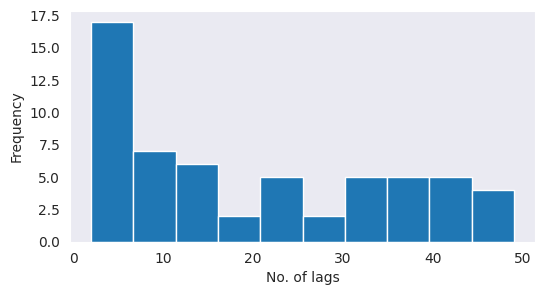

In [91]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams["nlags"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of lags");

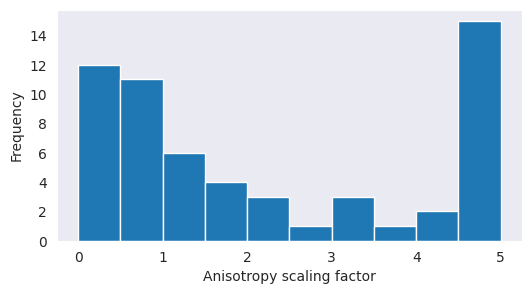

In [92]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams["anisotropy_scaling"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Anisotropy scaling factor");

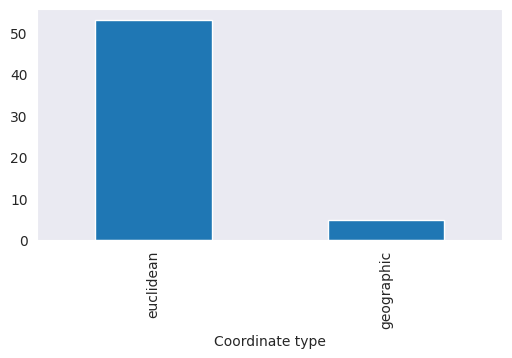

In [93]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams.groupby("coordinates_type").count()["nlags"].plot.bar(ax=ax)
ax.set_xlabel("Coordinate type");

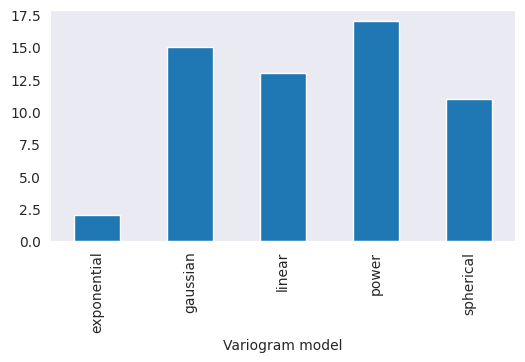

In [94]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams.groupby("variogram_model").count()["nlags"].plot.bar(ax=ax)
ax.set_xlabel("Variogram model");

### 2b. IDW

In [ ]:
idw_hparams = pd.read_csv(IDW_RESULTS / "hparams_summary.csv")

In [ ]:
idw_hparams = sinet_hparams.drop("dataset_id", axis=1)
idw_hparams.head()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["k"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of neighbours");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["k_min"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Min. no. of neighbours");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["power"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Power factor");

### 2c. MMGN

In [58]:
mmgn_hparams = pd.read_csv(MMGN_RESULTS / "hparams_summary.csv")

In [59]:
mmgn_hparams.head()

,dataset_id,lr,weight_decay,num_epochs,batch_size,hidden_dim,latent_dim,n_layers,input_scale,alpha,opt_loss
0,18840905,0.005825,0.00,500,32,512,32,2,512,0,0.492158
1,18870704,0.005153,0.00,500,42,512,211,5,512,0,0.708231
2,18931102,0.010000,0.00,500,293,128,32,5,512,0,0.610652
3,18960629,0.010000,0.00,500,32,256,32,5,512,0,0.561994
4,18990407,0.010000,0.01,500,32,1024,32,5,512,1,0.776227


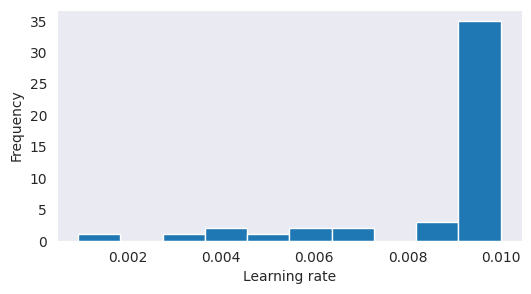

In [60]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["lr"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Learning rate");

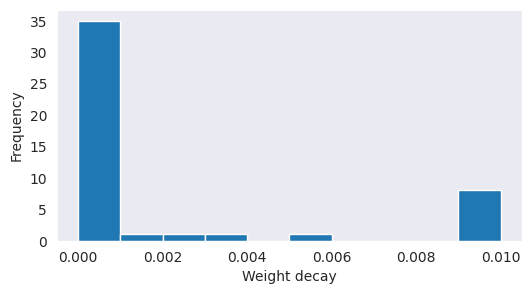

In [61]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["weight_decay"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Weight decay");

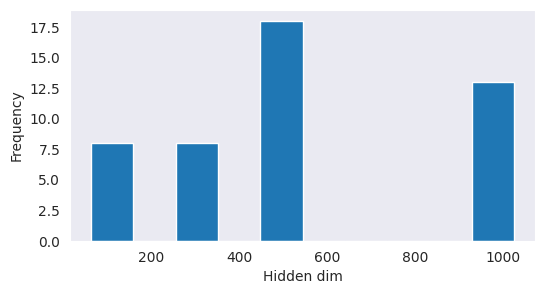

In [62]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["hidden_dim"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Hidden dim");

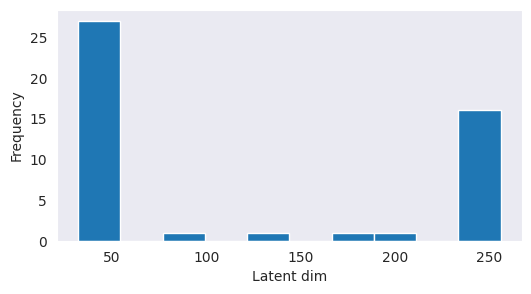

In [63]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["latent_dim"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Latent dim");

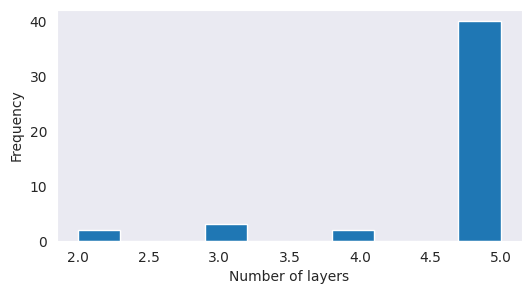

In [64]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["n_layers"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Number of layers");

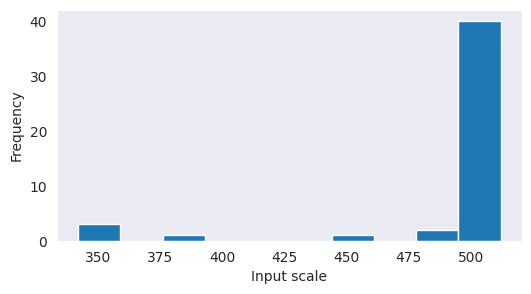

In [65]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["input_scale"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Input scale");

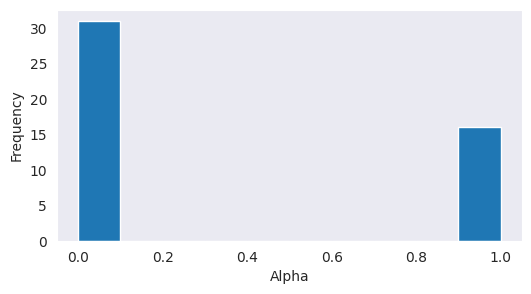

In [66]:
fig, ax = plt.subplots(figsize=(6, 3))
mmgn_hparams["alpha"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Alpha");

### 2d. SiNET

In [39]:
sinet_hparams = pd.read_csv(SINET_RESULTS / "hparams_summary.csv")

In [48]:
sinet_hparams.head()

,lr,weight_decay,num_epochs,scale,batch_size,mse_loss_weight,eikonal_loss_weight,laplace_loss_weight,patience,hidden_dim,opt_loss
0,0.001947,0.000000,500,2.490679,1024,1.0,0.000000,0.0,10,128,0.444247
1,0.005793,0.000000,422,10.000000,1024,1.0,0.000000,0.0,200,64,0.715411
2,0.005813,0.010000,500,8.686217,1024,1.0,0.000000,0.0,49,128,0.658417
3,0.005640,0.006019,500,5.219253,782,1.0,0.003419,0.0,10,64,0.505999
4,0.009769,0.000000,307,4.419235,1024,1.0,0.010000,0.0,106,128,0.831679


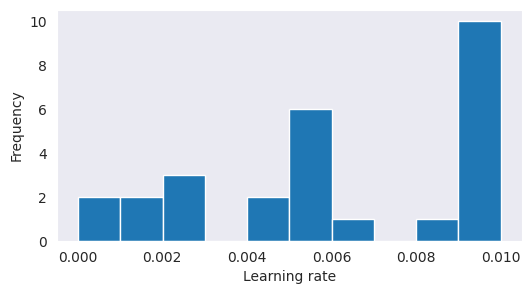

In [49]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["lr"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Learning rate");

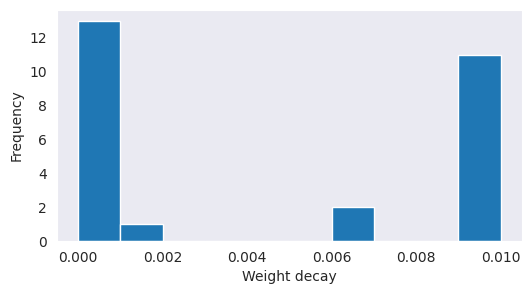

In [50]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["weight_decay"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Weight decay");

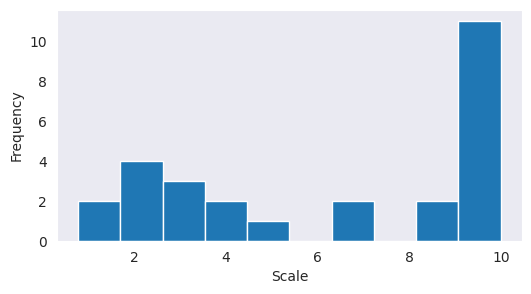

In [51]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["scale"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Scale");

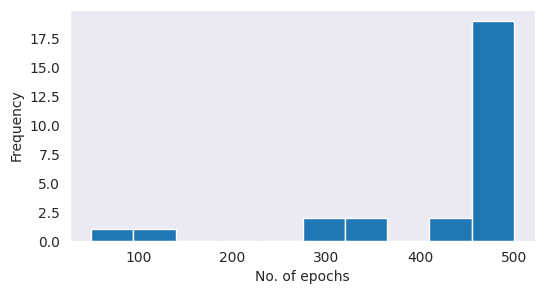

In [52]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["num_epochs"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of epochs");

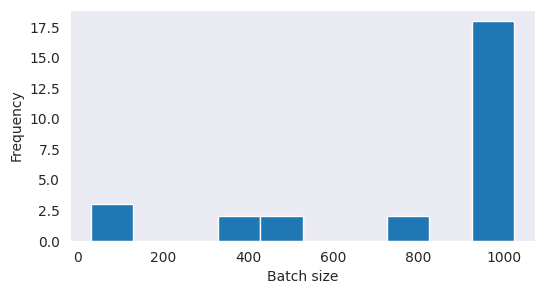

In [53]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["batch_size"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Batch size");

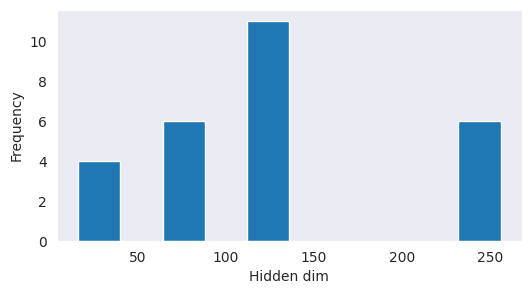

In [54]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["hidden_dim"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Hidden dim");

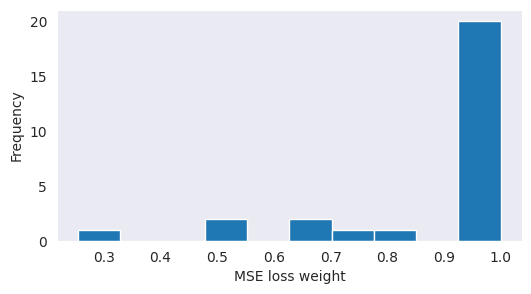

In [55]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["mse_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("MSE loss weight");

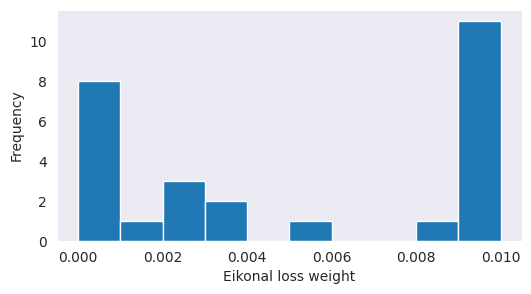

In [56]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["eikonal_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Eikonal loss weight");

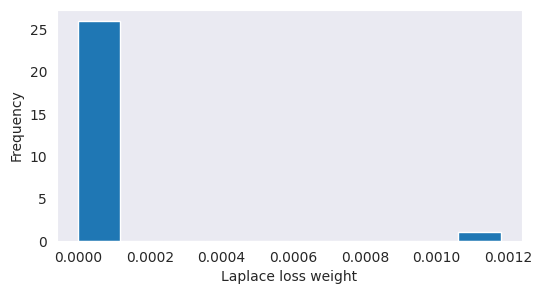

In [57]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["laplace_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Laplace loss weight");